In [1]:
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(url, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x27c3edc8518>)

In [3]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col = 'Date',parse_dates = True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [4]:
data['Total'] = data['Fremont Bridge East Sidewalk'] + data['Fremont Bridge West Sidewalk']
data['Year'] = data.index.year
data['Time'] = data.index.hour
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Year,Time
Date,,,,,
2012-10-03 00:00:00,9.0,4.0,13.0,2012,0
2012-10-03 01:00:00,6.0,4.0,10.0,2012,1
2012-10-03 02:00:00,1.0,1.0,2.0,2012,2
2012-10-03 03:00:00,3.0,2.0,5.0,2012,3
2012-10-03 04:00:00,1.0,6.0,7.0,2012,4


In [5]:
df = data

In [6]:
data2 = df.loc['2016':]

In [7]:
data2.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Year,Time
Date,,,,,
2016-01-01 00:00:00,9.0,9.0,18.0,2016,0
2016-01-01 01:00:00,12.0,3.0,15.0,2016,1
2016-01-01 02:00:00,5.0,6.0,11.0,2016,2
2016-01-01 03:00:00,6.0,1.0,7.0,2016,3
2016-01-01 04:00:00,2.0,0.0,2.0,2016,4


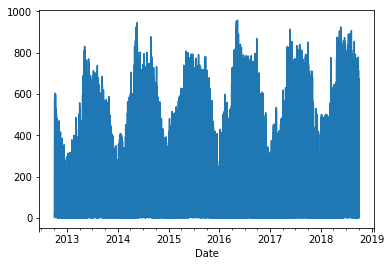

In [8]:
%matplotlib inline
data['Total'].resample('H').mean().plot();

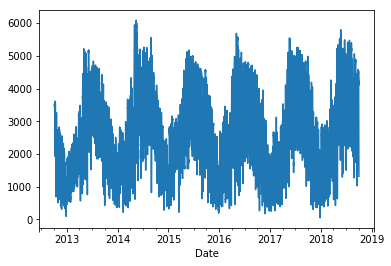

In [9]:
import matplotlib.pyplot as plt
data['Total'].resample('H').sum().rolling(24).sum().plot();

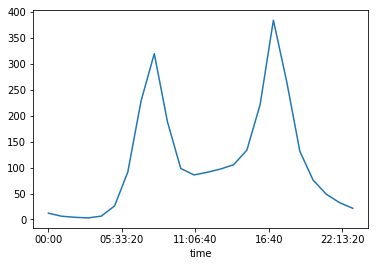

In [10]:
data['Total'].groupby(data.index.time).mean().plot();